In [2]:
#importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#loading the dataset
df = pd.read_csv('student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape

(25, 2)

In [5]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [7]:
from sklearn.model_selection import train_test_split as tts
train, test = tts(df, train_size = 0.8, test_size = 0.2)

In [8]:
print(train)

    Hours  Scores
6     9.2      88
24    7.8      86
2     3.2      27
9     2.7      25
5     1.5      20
22    3.8      35
14    1.1      17
3     8.5      75
13    3.3      42
8     8.3      81
10    7.7      85
1     5.1      47
4     3.5      30
11    5.9      62
18    6.1      67
17    1.9      24
23    6.9      76
7     5.5      60
16    2.5      30
15    8.9      95


In [9]:
train_x = train.loc[:, train.columns != "Scores"]
test_x = test.loc[:, test.columns != "Scores"]

train_y = train['Scores']
test_y = test['Scores']

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
test_pred = model.predict(test_x)

In [12]:
result = pd.DataFrame({'Actual_Score': test_y,
                       'Predicted_Score': test_pred})
print(result)

    Actual_Score  Predicted_Score
0             21        27.538684
19            69        75.366567
20            30        29.490842
21            54        49.988507
12            41        47.060269


In [13]:
#Computing mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(mean_squared_error(test_y, test_pred))
print(mean_absolute_error(test_y, test_pred))

27.273149480635958
4.697234209784819


In [14]:
#computing r2_score
from sklearn.metrics import r2_score
print(r2_score(test_y, test_pred)*100)

90.62133786773178


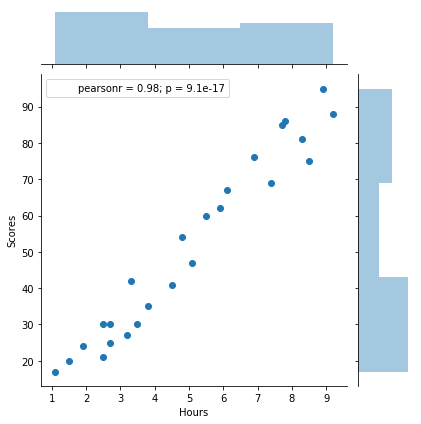

In [16]:
sns.jointplot(df['Hours'], df['Scores'])
plt.show()